Вариант 1
ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,0.1,10,3,8,0,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0

# Задание 1

In [40]:
import pandas as pd

df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")


Работаем с столбцом: Sleep_Hours
1. Среднее: 6.4898
2. Дисперсия: 2.2215
ModeResult(mode=np.float64(6.1), count=np.int64(89))
4. Медиана: 6.5000
5. Квантили:
   (0.25): 5.5000
   (0.5, медиана): 6.5000
   (0.75): 7.5000
6. Эксцесс: -0.2969
7. Асимметрия: 0.0118
8. Интерквартильный размах: 2.0000

ПОСТРОЕНИЕ ГРАФИКОВ


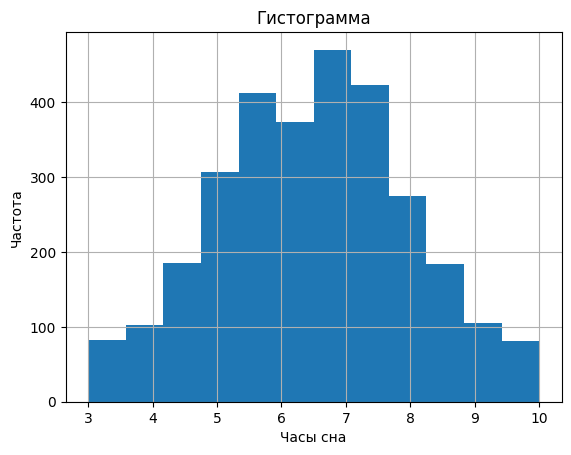

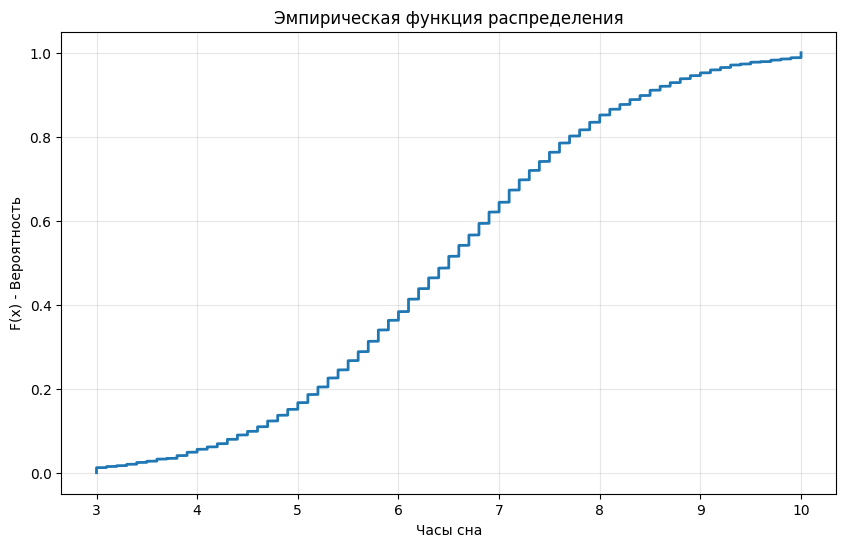

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os


N = 22
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]

print(f"\nРаботаем с столбцом: {col}")


# 1. Среднее
mean_val = np.mean(df[col])
print(f"1. Среднее: {mean_val:.4f}")

# 2. Дисперсия
variance_val = np.var(df[col])
print(f"2. Дисперсия: {variance_val:.4f}")

# 3. Мода
mode_val = stats.mode(df[col])
print(mode_val)

# 4. Медиана
median_val = np.median(df[col])
print(f"4. Медиана: {median_val:.4f}")

# 5. Квантили
quantiles = np.quantile(df[col], [0.25, 0.5, 0.75])
print(f"5. Квантили:")
print(f"   (0.25): {quantiles[0]:.4f}")
print(f"   (0.5, медиана): {quantiles[1]:.4f}")
print(f"   (0.75): {quantiles[2]:.4f}")

# 6. Эксцесс
kurtosis_val = stats.kurtosis(df[col])
print(f"6. Эксцесс: {kurtosis_val:.4f}")

# 7. Асимметрия
skewness_val = stats.skew(df[col])
print(f"7. Асимметрия: {skewness_val:.4f}")

# 8. Интерквартильный размах
iqr_val = stats.iqr(df[col])
print(f"8. Интерквартильный размах: {iqr_val:.4f}")


# II. Построение графиков
print("\n" + "="*60)
print("ПОСТРОЕНИЕ ГРАФИКОВ")
print("="*60)


# 1. Гистограмма
n = len(df[col])
df[col].hist(bins=1 + int(np.log2(n)))
plt.xlabel('Часы сна')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

# 2. Эмпирическая функция распределения
sorted_data = np.sort(df[col])
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, y, linewidth=2)
plt.xlabel('Часы сна')
plt.ylabel('F(x) - Вероятность')
plt.title('Эмпирическая функция распределения')
plt.grid(True, alpha=0.3)
plt.show()



Вывод из значений: 
1. Значения асимметрии, практически равное нулю, и совпадение среднего и медианы говорят о том, что распределение данных симметрично.
2. Отрицательный эксцесс указывает на то, что данные не сконцентрированы жестко вокруг среднего, а имеют немного более равномерное распределение в центральной части.
3. Распределение близко к нормальному, но имеет немного более плоскую форму.

Вывод из графиков:
Распределение является биомодальным.

# Задание 2

Проверить данные на нормальность, используя критерии:

1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса


1. Хи-квадрат
False

2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
Распределение отличается от нормального

3. Q-Q plot


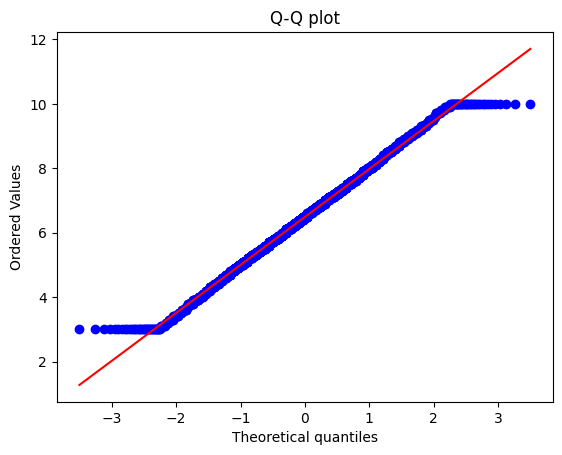

In [42]:
import numpy as np
import scipy
import scipy.stats as stats
from typing import List, Tuple

# 1. КРИТЕРИЙ ХИ-КВАДРАТ
print("\n" + "="*50)
print("1. Хи-квадрат")
print("="*50)

def chi_square_normality_test(data, alpha=0.05) -> bool:
    data_array = np.array(data)
    n = len(data_array)
    k = 1 + int(np.log2(n))

    mean = np.mean(data_array)
    std = np.std(data_array, ddof=1)

    intervals = np.linspace(min(data), max(data), k + 1)

    observed_freq, bin_edges = np.histogram(data, bins=intervals)

    cdf = stats.norm.cdf(bin_edges, mean, std)
    expected_freq = len(data) * np.diff(cdf)
    
    valid_mask = expected_freq > 0
    chi2_stat = np.sum((observed_freq[valid_mask] - expected_freq[valid_mask])**2 / 
                       expected_freq[valid_mask])
    
    deg = k - 1 - 2
    c_value = stats.chi2.ppf(1 - alpha, deg)
    
    return chi2_stat < c_value

# Применяем критерий
print(chi_square_normality_test(df[col]))


# 2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
print("\n" + "="*50)
print("2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА")
print("="*50)


_, p_val = scipy.stats.normaltest(df[col])
if p_val > 0.05:
    print("Распределение не отличается от нормального")
else:
    print("Распределение отличается от нормального")


# 3. Q-Q PLOT (реализация вручную)
print("\n" + "="*50)
print("3. Q-Q plot")
print("="*50)


stats.probplot(df[col], dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()



Из рассмотренных критериев можно сделать вывод, что наши данные пришли не из нормального распределения.

По графику делаем вывод, что так как не все точки лежат вдоль красной линии, то это еще раз подтверждает, что данные пришли не из нормального распределения.

# Задание 3

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:

1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

In [43]:
# 1. МЕТОДЫ УДАЛЕНИЯ И УСЕЧЕНИЯ ВЫБРОСОВ
    
def remove_outliers_iqr(data, factor=1.5):
    """
    Удаление выбросов по методу межквартильного размаха (IQR)
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
        
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
        
    mask = (data >= lower_bound) & (data <= upper_bound)
    cleaned_data = data[mask]

    print(min(data), max(data))
    print(lower_bound, upper_bound)
        
    return cleaned_data
    
def winsorize_data(data, limits=0.05):
    """
    Усечение выбросов с помощью Winsorization
    """
    from scipy.stats.mstats import winsorize
        
    winsorized = winsorize(data, limits=limits)    
    return winsorized

df[col] = remove_outliers_iqr(df[col])
df[col], _ = stats.boxcox(df[col])


3.0 10.0
2.5 10.5


Видно, что явных выбросов нет

Выполните пункты I и II для обработанных данных

1. Среднее: 5.1065
2. Дисперсия: 1.7896
ModeResult(mode=np.float64(4.765859647403333), count=np.int64(89))
4. Медиана: 5.1250
5. Квантили:
   (0.25): 4.2246
   (0.5, медиана): 5.1250
   (0.75): 6.0172
6. Эксцесс: -0.2892
7. Асимметрия: -0.0241
8. Интерквартильный размах: 1.7926

ПОСТРОЕНИЕ ГРАФИКОВ


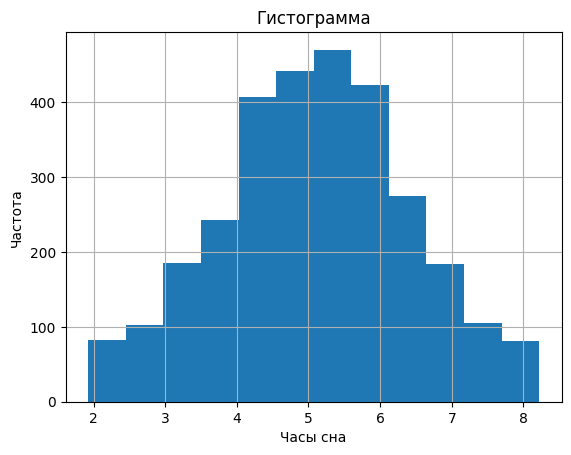

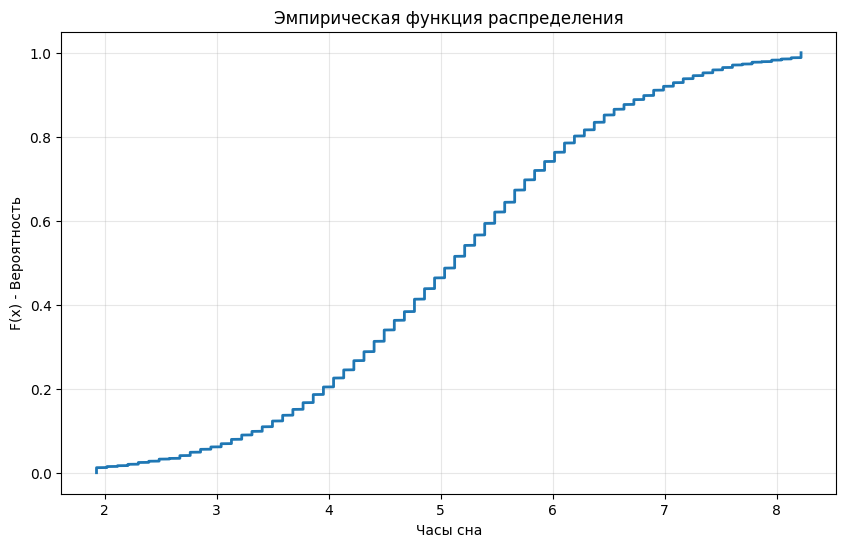

In [44]:

# 1. Среднее
mean_val = np.mean(df[col])
print(f"1. Среднее: {mean_val:.4f}")

# 2. Дисперсия
variance_val = np.var(df[col])
print(f"2. Дисперсия: {variance_val:.4f}")

# 3. Мода
mode_val = stats.mode(df[col])
print(mode_val)

# 4. Медиана
median_val = np.median(df[col])
print(f"4. Медиана: {median_val:.4f}")

# 5. Квантили
quantiles = np.quantile(df[col], [0.25, 0.5, 0.75])
print(f"5. Квантили:")
print(f"   (0.25): {quantiles[0]:.4f}")
print(f"   (0.5, медиана): {quantiles[1]:.4f}")
print(f"   (0.75): {quantiles[2]:.4f}")

# 6. Эксцесс
kurtosis_val = stats.kurtosis(df[col])
print(f"6. Эксцесс: {kurtosis_val:.4f}")

# 7. Асимметрия
skewness_val = stats.skew(df[col])
print(f"7. Асимметрия: {skewness_val:.4f}")

# 8. Интерквартильный размах
iqr_val = stats.iqr(df[col])
print(f"8. Интерквартильный размах: {iqr_val:.4f}")


# II. Построение графиков
print("\n" + "="*60)
print("ПОСТРОЕНИЕ ГРАФИКОВ")
print("="*60)


# 1. Гистограмма
n = len(df[col])
df[col].hist(bins=1 + int(np.log2(n)))
plt.xlabel('Часы сна')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.show()

# 2. Эмпирическая функция распределения
sorted_data = np.sort(df[col])
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, y, linewidth=2)
plt.xlabel('Часы сна')
plt.ylabel('F(x) - Вероятность')
plt.title('Эмпирическая функция распределения')
plt.grid(True, alpha=0.3)
plt.show()




1. Хи-квадрат
False

2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
Распределение отличается от нормального

3. Q-Q plot


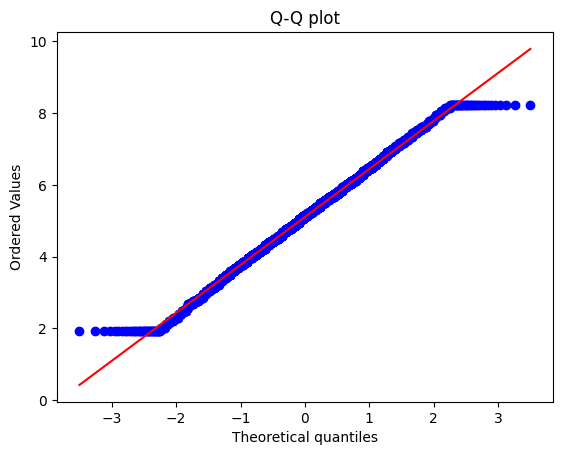

In [45]:
# 1. КРИТЕРИЙ ХИ-КВАДРАТ
print("\n" + "="*50)
print("1. Хи-квадрат")
print("="*50)

# Применяем критерий
print(chi_square_normality_test(df[col]))


# 2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
print("\n" + "="*50)
print("2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА")
print("="*50)


_, p_val = scipy.stats.normaltest(df[col])
if p_val > 0.05:
    print("Распределение не отличается от нормального")
else:
    print("Распределение отличается от нормального")


# 3. Q-Q PLOT (реализация вручную)
print("\n" + "="*50)
print("3. Q-Q plot")
print("="*50)


stats.probplot(df[col], dist='norm', plot=plt)
plt.title('Q-Q plot')
plt.show()

Не получилось привести данные к нормальному, но теперь распределение унимодально.

# 4 задание

Сгруппируйте данные по столбцу 'School_Grade'.

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы



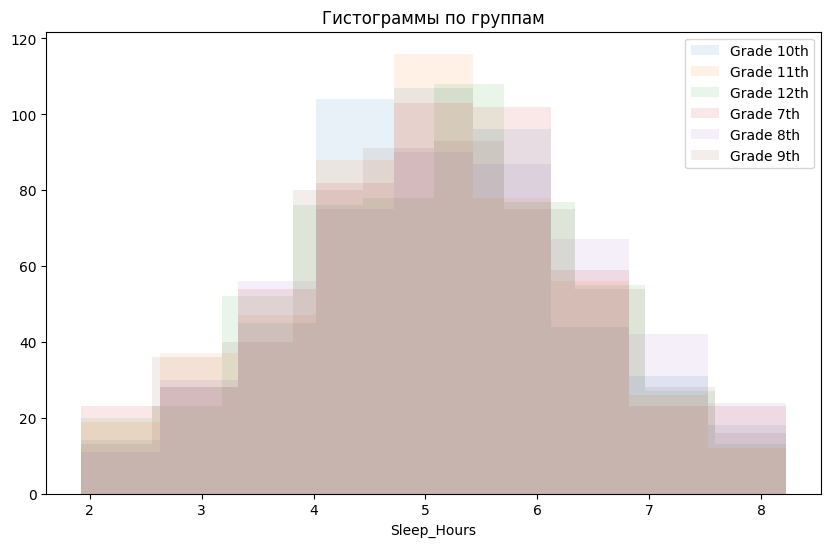

In [47]:
plt.figure(figsize=(10,6))

groups = df.groupby('School_Grade')

for grade, group in groups:
    plt.hist(group[col], bins=1 + int(np.log2(len(group))), alpha=0.1, label=f'Grade {grade}')

plt.xlabel(col)
plt.title('Гистограммы по группам')
plt.legend()
plt.show()

In [50]:
groups[col].agg(['mean', 'var'])

,mean,var
School_Grade,,
10th,5.105835,1.690414
11th,4.997105,1.707280
12th,5.079638,1.776198
7th,5.100818,1.843838
8th,5.272236,1.932467
9th,5.087514,1.770858


По графику видно, что присутствует 4 моды у рассмотренных распределений.